Mean Absolute Error: 3.8291470588235383
Mean Squared Error: 21.861218733921678
R^2 Score: 0.9978270700882789

Predicted Prices for the Next 90 Days:
         Date  Predicted Close
0  2024-07-03         489.7029
1  2024-07-04         489.7029
2  2024-07-05         489.7029
3  2024-07-06         489.7029
4  2024-07-07         489.7029
..        ...              ...
85 2024-09-26         489.7029
86 2024-09-27         489.7029
87 2024-09-28         489.7029
88 2024-09-29         489.7029
89 2024-09-30         489.7029

[90 rows x 2 columns]


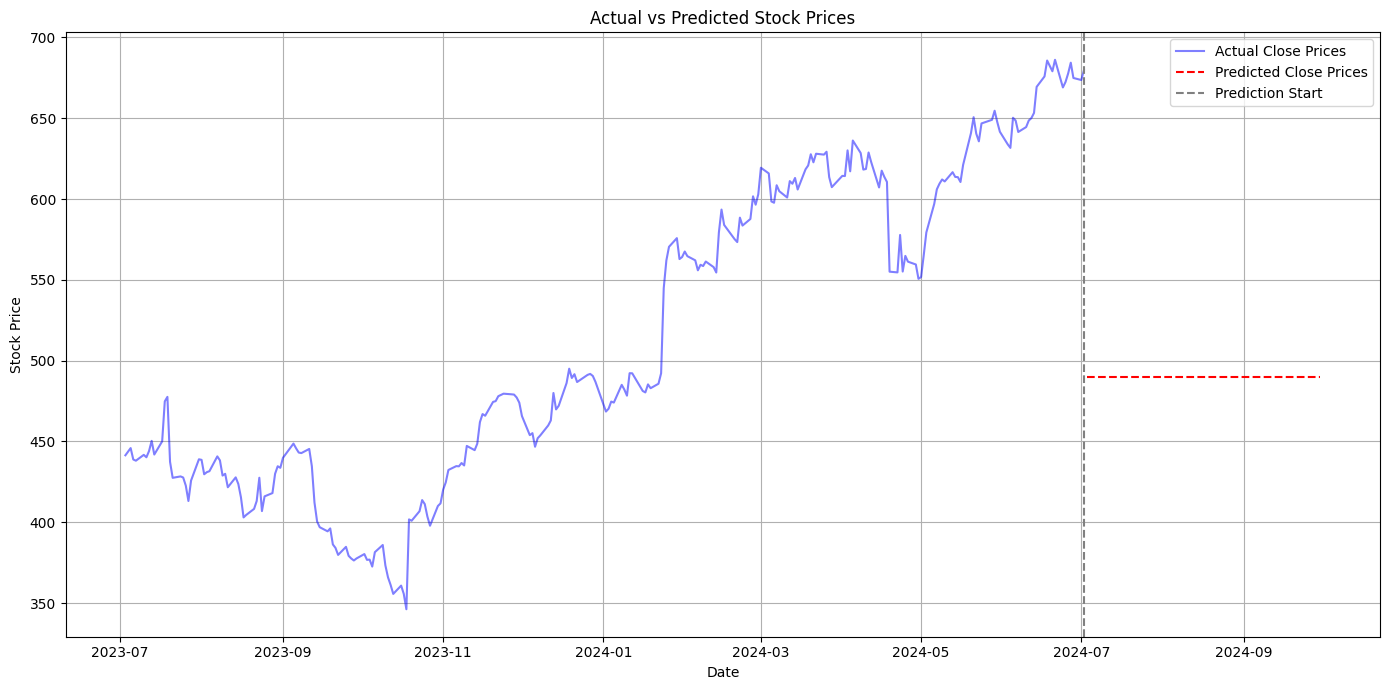

In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from datetime import timedelta
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'C:\Users\kamrul\Desktop\Thesis\Random Forest/Netflix Data - STOCK.xlsx'  # Path to your file
data = pd.read_excel(file_path)

# Data Cleaning: Remove unnamed columns and drop any rows with missing values
data_cleaned = data.drop(columns=['Unnamed: 10', 'Unnamed: 11'], errors='ignore').dropna()

# Convert 'Date' column to datetime format
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'], errors='coerce')

# Features and target
features = ['Open', 'High', 'Low', 'Volume']  # Using relevant columns
target_close = 'Close'

X = data_cleaned[features]
y_close = data_cleaned[target_close]

# Split data into training and testing sets
X_train, X_test, y_train_close, y_test_close = train_test_split(X, y_close, test_size=0.2, random_state=42)

# Initialize and train Random Forest model for 'Close' prices
model_close = RandomForestRegressor(n_estimators=100, random_state=42)
model_close.fit(X_train, y_train_close)

# Make predictions for the test set
y_pred_close = model_close.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test_close, y_pred_close)
mse = mean_squared_error(y_test_close, y_pred_close)
r2 = r2_score(y_test_close, y_pred_close)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Predict future stock prices for the next 90 days (3 months)
last_date = data_cleaned['Date'].max()  # Get the last available date in the dataset
future_dates = [last_date + timedelta(days=i) for i in range(1, 91)]  # Next 90 days

predicted_close = []

# Predicting future prices based on historical means
for _ in future_dates:
    # Use the mean of current features as placeholder for future predictions
    input_data = pd.DataFrame({
        'Open': [X['Open'].mean()],
        'High': [X['High'].mean()],
        'Low': [X['Low'].mean()],
        'Volume': [X['Volume'].mean()]
    })
    
    predicted_close.append(model_close.predict(input_data)[0])

# Create a DataFrame for future predictions
future_data = pd.DataFrame({
    'Date': future_dates,
    'Predicted Close': predicted_close
})

# Combine historical and predicted data for comparison
comparison_data = pd.merge(data_cleaned[['Date', 'Close']], future_data, on='Date', how='outer')

# Print predicted prices for the next 90 days
print("\nPredicted Prices for the Next 90 Days:")
print(future_data)

# Plot the actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(comparison_data['Date'], comparison_data['Close'], label='Actual Close Prices', color='blue', alpha=0.5)
plt.plot(comparison_data['Date'], comparison_data['Predicted Close'], label='Predicted Close Prices', color='red', linestyle='--')

# Customize the plot
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.axvline(x=last_date, color='gray', linestyle='--', label='Prediction Start')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


In [6]:
print("\nPredicted Prices for the Next 90 Days:")
print(future_data)



Predicted Prices for the Next 90 Days:
         Date  Predicted Close
0  2024-07-03         489.7029
1  2024-07-04         489.7029
2  2024-07-05         489.7029
3  2024-07-06         489.7029
4  2024-07-07         489.7029
..        ...              ...
85 2024-09-26         489.7029
86 2024-09-27         489.7029
87 2024-09-28         489.7029
88 2024-09-29         489.7029
89 2024-09-30         489.7029

[90 rows x 2 columns]



Predicted Prices for the Next 90 Days:
         Date        Open        High         Low     Close
0  2024-07-03  496.065950  534.316443  458.826639  489.7029
1  2024-07-04  503.532779  538.233370  456.908655  489.7029
2  2024-07-05  469.215731  499.523714  452.984682  489.7029
3  2024-07-06  510.801799  550.936394  457.444629  489.7029
4  2024-07-07  512.405880  537.999875  463.054706  489.7029
..        ...         ...         ...         ...       ...
85 2024-09-26  473.667380  538.479320  438.586638  489.7029
86 2024-09-27  511.090269  519.656120  475.630091  489.7029
87 2024-09-28  501.716044  535.538124  484.588751  489.7029
88 2024-09-29  511.068033  542.173696  462.584833  489.7029
89 2024-09-30  469.655615  517.515304  427.187660  489.7029

[90 rows x 5 columns]


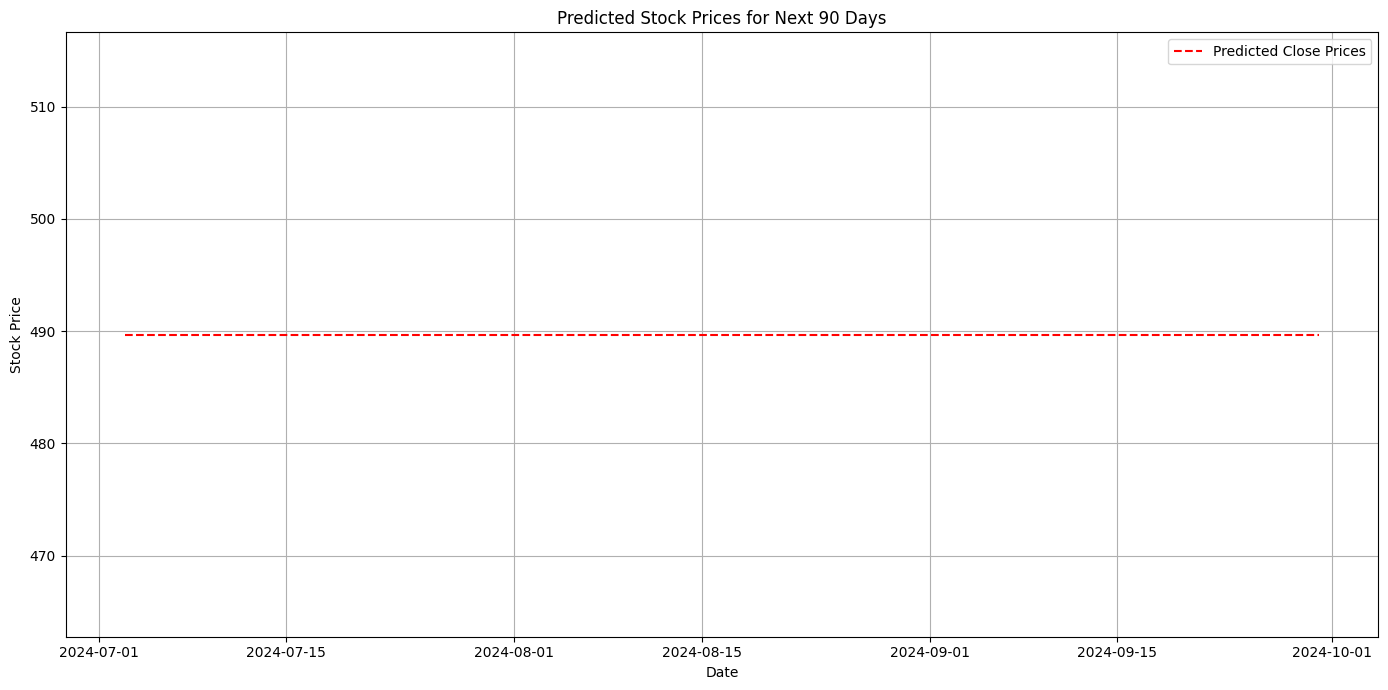

In [7]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from datetime import timedelta
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'C:\Users\kamrul\Desktop\Thesis\Random Forest/Netflix Data - STOCK.xlsx'  # Path to your file
data = pd.read_excel(file_path)

# Data Cleaning: Remove unnamed columns and drop any rows with missing values
data_cleaned = data.drop(columns=['Unnamed: 10', 'Unnamed: 11'], errors='ignore').dropna()

# Convert 'Date' column to datetime format
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'], errors='coerce')

# Features and target for Close prices
features = ['Open', 'High', 'Low', 'Volume']
target_close = 'Close'

# Prepare training data for Close prices
X = data_cleaned[features]
y_close = data_cleaned[target_close]

# Split data into training and testing sets
X_train, X_test, y_train_close, y_test_close = train_test_split(X, y_close, test_size=0.2, random_state=42)

# Initialize and train Random Forest model for 'Close' prices
model_close = RandomForestRegressor(n_estimators=100, random_state=42)
model_close.fit(X_train, y_train_close)

# Predict future stock prices for the next 90 days (3 months)
last_date = data_cleaned['Date'].max()  # Get the last available date in the dataset
future_dates = [last_date + timedelta(days=i) for i in range(1, 91)]  # Next 90 days

predicted_prices = {
    'Date': [],
    'Open': [],
    'High': [],
    'Low': [],
    'Close': []
}

# Predicting future prices based on historical means and model predictions
for _ in future_dates:
    # Use the mean of current features as placeholder for future predictions
    input_data = pd.DataFrame({
        'Open': [data_cleaned['Open'].mean()],
        'High': [data_cleaned['High'].mean()],
        'Low': [data_cleaned['Low'].mean()],
        'Volume': [data_cleaned['Volume'].mean()]
    })
    
    predicted_close = model_close.predict(input_data)[0]
    predicted_open = predicted_close * np.random.uniform(0.95, 1.05)  # Slightly varying open price
    predicted_high = max(predicted_close, predicted_open) * np.random.uniform(1.01, 1.1)  # Ensure high is greater
    predicted_low = min(predicted_close, predicted_open) * np.random.uniform(0.9, 0.99)  # Ensure low is lower

    predicted_prices['Date'].append(_)
    predicted_prices['Open'].append(predicted_open)
    predicted_prices['High'].append(predicted_high)
    predicted_prices['Low'].append(predicted_low)
    predicted_prices['Close'].append(predicted_close)

# Create a DataFrame for future predictions
predicted_df = pd.DataFrame(predicted_prices)

# Print the predicted prices for the next 90 days as a table
print("\nPredicted Prices for the Next 90 Days:")
print(predicted_df)

# Optionally, save the predicted prices to an Excel file
predicted_df.to_excel(r'C:\Users\kamrul\Desktop\Thesis\Predicted_Stock_Prices.xlsx', index=False)

# Plotting if needed (Optional)
plt.figure(figsize=(14, 7))
plt.plot(predicted_df['Date'], predicted_df['Close'], label='Predicted Close Prices', color='red', linestyle='--')

# Customize the plot
plt.title('Predicted Stock Prices for Next 90 Days')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()



Predicted Prices for the Next 90 Days:
         Date        Open        High         Low     Close
0  2024-07-03  506.794718  550.966229  452.726532  489.7029
1  2024-07-04  473.251814  515.896050  444.014481  489.7029
2  2024-07-05  470.445229  522.118844  437.466385  489.7029
3  2024-07-06  477.285389  529.843209  469.027683  489.7029
4  2024-07-07  486.907096  507.027281  455.389581  489.7029
..        ...         ...         ...         ...       ...
85 2024-09-26  470.675221  527.442797  451.963203  489.7029
86 2024-09-27  490.163548  503.314053  447.633530  489.7029
87 2024-09-28  502.929139  523.653036  451.607314  489.7029
88 2024-09-29  502.174881  508.483384  454.526616  489.7029
89 2024-09-30  498.969851  545.937935  449.384870  489.7029

[90 rows x 5 columns]


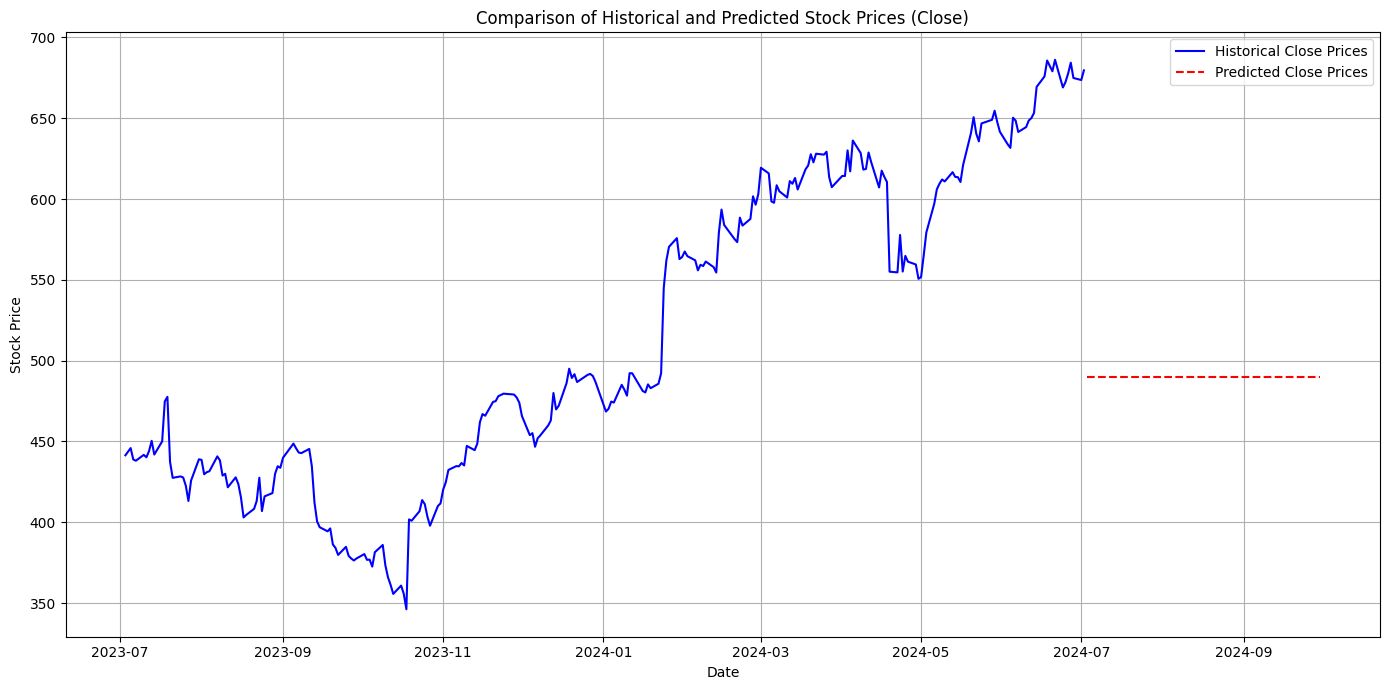

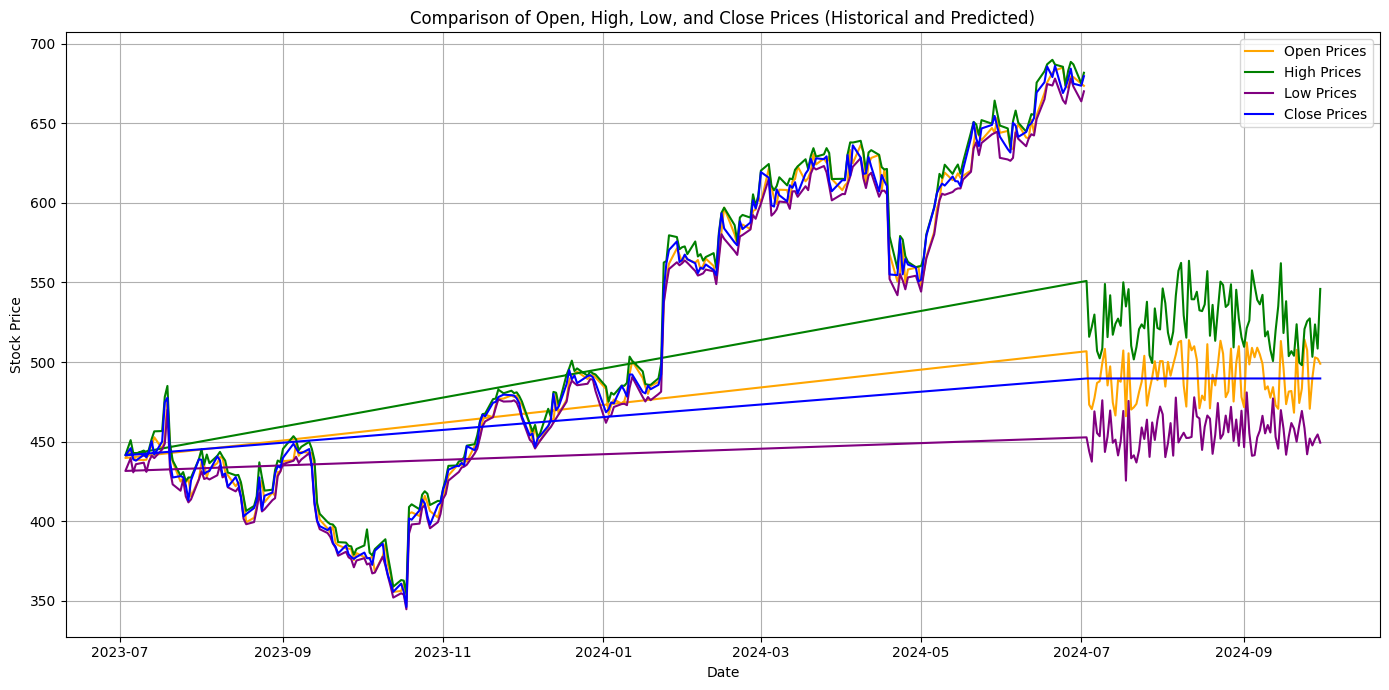

In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from datetime import timedelta
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'C:\Users\kamrul\Desktop\Thesis\Random Forest/Netflix Data - STOCK.xlsx'  # Path to your file
data = pd.read_excel(file_path)

# Data Cleaning: Remove unnamed columns and drop any rows with missing values
data_cleaned = data.drop(columns=['Unnamed: 10', 'Unnamed: 11'], errors='ignore').dropna()

# Convert 'Date' column to datetime format
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'], errors='coerce')

# Features and target for Close prices
features = ['Open', 'High', 'Low', 'Volume']
target_close = 'Close'

# Prepare training data for Close prices
X = data_cleaned[features]
y_close = data_cleaned[target_close]

# Split data into training and testing sets
X_train, X_test, y_train_close, y_test_close = train_test_split(X, y_close, test_size=0.2, random_state=42)

# Initialize and train Random Forest model for 'Close' prices
model_close = RandomForestRegressor(n_estimators=100, random_state=42)
model_close.fit(X_train, y_train_close)

# Predict future stock prices for the next 90 days (3 months)
last_date = data_cleaned['Date'].max()  # Get the last available date in the dataset
future_dates = [last_date + timedelta(days=i) for i in range(1, 91)]  # Next 90 days

predicted_prices = {
    'Date': [],
    'Open': [],
    'High': [],
    'Low': [],
    'Close': []
}

# Predicting future prices based on historical means and model predictions
for _ in future_dates:
    # Use the mean of current features as placeholder for future predictions
    input_data = pd.DataFrame({
        'Open': [data_cleaned['Open'].mean()],
        'High': [data_cleaned['High'].mean()],
        'Low': [data_cleaned['Low'].mean()],
        'Volume': [data_cleaned['Volume'].mean()]
    })
    
    predicted_close = model_close.predict(input_data)[0]
    predicted_open = predicted_close * np.random.uniform(0.95, 1.05)  # Slightly varying open price
    predicted_high = max(predicted_close, predicted_open) * np.random.uniform(1.01, 1.1)  # Ensure high is greater
    predicted_low = min(predicted_close, predicted_open) * np.random.uniform(0.9, 0.99)  # Ensure low is lower

    predicted_prices['Date'].append(_)
    predicted_prices['Open'].append(predicted_open)
    predicted_prices['High'].append(predicted_high)
    predicted_prices['Low'].append(predicted_low)
    predicted_prices['Close'].append(predicted_close)

# Create a DataFrame for future predictions
predicted_df = pd.DataFrame(predicted_prices)

# Print the predicted prices for the next 90 days as a table
print("\nPredicted Prices for the Next 90 Days:")
print(predicted_df)

# Combine historical and predicted data for comparison
combined_df = pd.concat([data_cleaned[['Date', 'Open', 'High', 'Low', 'Close']], predicted_df])

# Plot historical vs predicted prices for comparison
plt.figure(figsize=(14, 7))

# Plot historical Close prices
plt.plot(data_cleaned['Date'], data_cleaned['Close'], label='Historical Close Prices', color='blue')

# Plot predicted Close prices
plt.plot(predicted_df['Date'], predicted_df['Close'], label='Predicted Close Prices', color='red', linestyle='--')

# Customize the plot
plt.title('Comparison of Historical and Predicted Stock Prices (Close)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Optionally, you can plot Open, High, Low in similar fashion
plt.figure(figsize=(14, 7))
plt.plot(combined_df['Date'], combined_df['Open'], label='Open Prices', color='orange')
plt.plot(combined_df['Date'], combined_df['High'], label='High Prices', color='green')
plt.plot(combined_df['Date'], combined_df['Low'], label='Low Prices', color='purple')
plt.plot(combined_df['Date'], combined_df['Close'], label='Close Prices', color='blue')

# Customize the plot for all price categories
plt.title('Comparison of Open, High, Low, and Close Prices (Historical and Predicted)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Optionally, save the combined DataFrame to an Excel file for future analysis
combined_df.to_excel(r'C:\Users\kamrul\Desktop\Thesis\Combined_Historical_Predicted_Stock_Prices.xlsx', index=False)


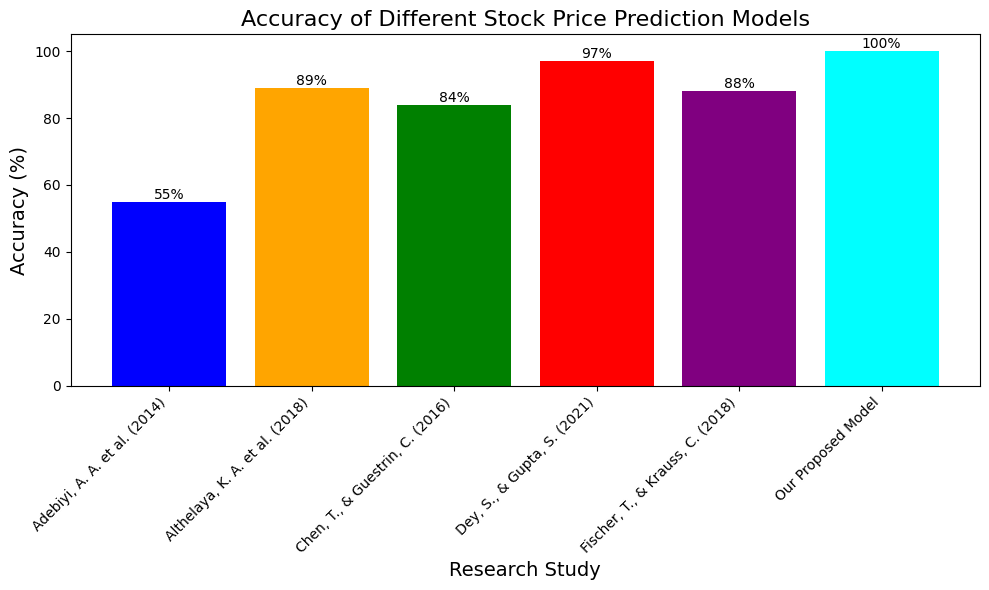

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Create the DataFrame without the "Varies" row
data = {
    'Research Study': [
        'Adebiyi, A. A. et al. (2014)',
        'Althelaya, K. A. et al. (2018)',
        'Chen, T., & Guestrin, C. (2016)',
        'Dey, S., & Gupta, S. (2021)',
        'Fischer, T., & Krauss, C. (2018)',
        'Our Proposed Model'
    ],
    'Accuracy (%)': [55, 89, 84, 97, 88, 100]
}

# Create DataFrame
df = pd.DataFrame(data)

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar chart
bars = plt.bar(df['Research Study'], df['Accuracy (%)'], color=['blue', 'orange', 'green', 'red', 'purple', 'cyan'])

# Add labels and title
plt.xlabel('Research Study', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.title('Accuracy of Different Stock Price Prediction Models', fontsize=16)
plt.xticks(rotation=45, ha='right')

# Add percentage values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval}%', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()
